## Points of Dispense Analysis

##### Maxwell Kennady, Nora Murray, Elizabeth Speigle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
distances = pd.read_csv('data/OD_Pairs_Distances.csv')
population = pd.read_excel('data/BG_master.xlsx')
bg_included = pd.read_csv('data/bg_pop_included.csv')
pods = pd.read_csv('data/POD_ids.csv')

In [3]:
dist_miles = distances.pivot(index='block_group', columns='pod_id', values='Miles')

In [4]:
dist = dist_miles.values
N = population['population'].values
prop = bg_included['all_included'].values

In [5]:
infile = open('pods_open_total','rb')
pods_total = pickle.load(infile)
infile.close()

In [6]:
infile = open('pods_open_minmax','rb')
pods_minmax = pickle.load(infile)
infile.close()

### Comparing average and maximum distance by PODs opened

In [ ]:
dist_compare = {'num_pods':[],
                'max_dist_total':[],
                'max_dist_minmax':[],
                'avg_dist_total':[],
                'avg_dist_minmax':[]}

for k in pods_total.keys():
    dist_compare['num_pods'].append(k)
    
    # Minimize total distance
    total_list = [N[j] * [dist[j,i]] for [j,i] in pods_total[k]]
    total_list_flat = [item for sublist in total_list for item in sublist]
    avg_total = sum(total_list_flat)/len(total_list_flat)
    max_total = max(total_list_flat)
    
    # Minimize maximum distance
    minmax_list = [N[j] * [dist[j,i]] for [j,i] in pods_minmax[k]]
    minmax_list_flat = [item for sublist in minmax_list for item in sublist]
    avg_minmax = sum(minmax_list_flat)/len(minmax_list_flat)
    max_minmax = max(minmax_list_flat)
    
    dist_compare['max_dist_total'].append(max_total)
    dist_compare['max_dist_minmax'].append(max_minmax)
    dist_compare['avg_dist_total'].append(avg_total)
    dist_compare['avg_dist_minmax'].append(avg_minmax)

In [ ]:
dist_df = pd.DataFrame(dist_compare)

In [ ]:
dist_df.head()

In [ ]:
cols = ['max_dist_total','max_dist_minmax','avg_dist_total','avg_dist_minmax']

In [ ]:
plt.plot(dist_df['num_pods'], dist_df[cols])
plt.title('Distance by Number of PODs Opened')
# add axis labels
plt.legend(cols)
plt.ylim(0, 13)
plt.show()

In [ ]:
cols = ['max_dist_total','avg_dist_total']

In [ ]:
plt.plot(dist_df['num_pods'], dist_df[cols])
plt.title('Distance by Number of PODs Opened - Total Distance Models')
plt.legend(cols)
plt.grid(b=True, which='major', color='#D3D3D3', linestyle='--')
plt.ylim(0, 13)
plt.show()

In [ ]:
cols = ['max_dist_minmax','avg_dist_minmax']

In [ ]:
plt.plot(dist_df['num_pods'], dist_df[cols])
plt.title('Distance by Number of PODs Opened - Minimax Models')
plt.legend(cols)
plt.grid(b=True, which='major', color='#D3D3D3', linestyle='--')
plt.ylim(0, 13)
plt.show()

### Histograms

In [13]:
# Get count of number of times each POD is in a solution given 10-47 PODs open

pods_open = []
hist_list = []

for p in pods_total.keys():
    for i in pods_total[p]:
        pods_open.append(i[1])
    hist_list.append(list(set(pods_open)))
    pods_open = []


# count number of times each POD is in solution
pod_ids = list(np.arange(0,47))

pod_count = [0] * 47

for i in hist_list:
    for v in pod_ids:
        if (v in i):
            pod_count[v] += 1 

In [14]:
pods["solution_count"] = pod_count
pods.reindex(columns=["id","site","solution_count"]).sort_values(by=["solution_count"], axis=0, ascending=False)

,id,site,solution_count
23,24,NORTH ALLEGHENY HIGH SCHOOL,38
29,30,PITTBURGH OBAMA 6-12,38
22,23,MT. LEBANON HIGH SCHOOL,38
19,20,MCKEESPORT AREA HIGH SCHOOL,38
17,18,HIGHLANDS HIGH SCHOOL,38
16,17,HAMPTON HIGH SCHOOL,38
40,41,STO-ROX SR HIGH SCHOOL,37
21,22,MOON AREA HIGH SCHOOL,37
15,16,GATEWAY HIGH SCHOOL,36
33,34,RIVERVIEW SENIOR HIGH SCHOOL,35


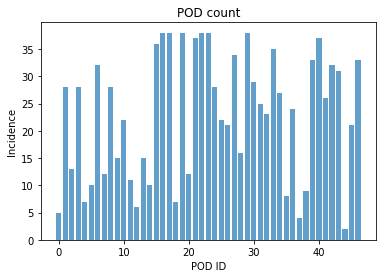

In [15]:
plt.bar(pod_ids, pod_count, align='center', alpha=0.7)
plt.ylabel('Incidence')
plt.xlabel('POD ID')
plt.title('POD count')
plt.show()

### Population

In [ ]:
population.head()

In [ ]:
# set number of pods to open (10-47)
num_pods_open = 20

#Merge population and pod data frames
pods_open = pd.DataFrame(pods_total[num_pods_open])
pods_open.columns = ["bg","pod"]

pods_open = pd.merge(population,
                     pods_open,
                     left_on = 'bg_id',
                     right_on = 'bg',
                     how = 'left')

pods_open.head()

In [ ]:
pods_open = pods_open.groupby("pod").population.sum().reset_index()

plt.bar(pods_open['pod'], pods_open['population'],align='center', alpha=0.7)
plt.ylabel('Population')
plt.xlabel('POD ID')
plt.title('Total population served by each POD')
plt.show()

print("The average number of people served by a POD is",  "{:,.0f}".format(np.average(pods_by_pop['population'])))

### Number of cars and distance between block group and PODs

In [ ]:
# analysis on number of hhs with no car and distance between block group and POD
# avg distance between POD and its selected BGs

In [ ]:
pods_open = pd.DataFrame(pods_total[num_pods_open])
pods_open.columns = ["bg","pod"]
pods_open.head()

In [ ]:
bg_pod_dist = []
    
for i in np.arange(0,len(pods_open)):    
    bg_pod_dist.append(dist_miles.iloc[pods_open.iloc[i,0],(pods_open.iloc[i,1]-1)])

bg_pod_dist = pd.merge(pods_open, 
                pd.DataFrame(bg_pod_dist), 
                left_index=True, 
                right_index=True)

bg_pod_dist.columns = ["bg","pod","distance"]

In [ ]:
bg_pod_dist = pd.merge(population,
                bg_pod_dist,
                left_on = 'bg_id',
                right_on = 'bg',
                how = 'left')

# calculate proportion of households with no car
bg_pod_dist['prop_hh_no_car'] = bg_pod_dist['hh_no_car']/bg_pod_dist['num_hhs']
bg_pod_dist.head()

In [ ]:
pod_no_car = bg_pod_dist.groupby("pod").hh_no_car.sum().reset_index()
print(pod_no_car)

plt.bar(pod_no_car['pod'], pod_no_car['hh_no_car'],align='center', alpha=0.7)
plt.ylabel('Number of HHs with No Car')
plt.xlabel('POD ID')
plt.title('Number of Households with No Access to Car by POD')
plt.show()

# reword and edit/add POD id #
print("The average number of households with no car is",  "{:,.0f}".format(np.average(pod_no_car['hh_no_car'])))
print("Of these PODs, POD X has the highest number of households with no car:",  "{:,.0f}".format(np.max(pod_no_car['hh_no_car'])))
print("Of these PODs, POD X has the lowest number of households with no car is",  "{:,.0f}".format(np.min(pod_no_car['hh_no_car'])))

In [ ]:
pod_prop_no_car = bg_pod_dist.groupby("pod").prop_hh_no_car.mean().reset_index()
print(pod_prop_no_car)

plt.bar(pod_prop_no_car['pod'], pod_prop_no_car['prop_hh_no_car'],align='center', alpha=0.7)
plt.ylabel('Percentage')
plt.xlabel('POD ID')
plt.title('Percent of Households with No Access to Car by POD')
plt.show()

# reword and edit/add POD id #
print("Average percentage of households with no car is",  "{:,.2f}".format(np.average(pod_prop_no_car['prop_hh_no_car'])), ".")
print("The POD with the highest percentage of households with no car is",  "{:,.2f}".format(np.max(pod_prop_no_car['prop_hh_no_car'])), "by POD X.")
print("The POD with the lowest percentage of households with no car is",  "{:,.2f}".format(np.min(pod_prop_no_car['prop_hh_no_car'])), "by POD X.")

In [ ]:
pod_dist = bg_pod_dist.groupby("pod").distance.mean().reset_index()
print(pod_dist)

plt.bar(pod_dist['pod'], pod_dist['distance'],align='center', alpha=0.7)
plt.ylabel('Distance (miles)')
plt.xlabel('POD ID')
plt.title('Average Distance between POD and Assigned Block Groups (Miles)')
plt.show()

# add POD id #
print("The average distance between a POD and Block Group is",  "{:,.2f}".format(np.average(pod_dist["distance"])), "miles")
print("POD X has the lowest average distance between POD and block group at",  "{:,.2f}".format(np.min(pod_dist["distance"])), "miles")
print("POD X has the highest average distance between POD and block group at",  "{:,.2f}".format(np.max(pod_dist["distance"])), "miles")


### POD capacity

In [ ]:
# capacity_pod_all = [[N[j], i] for [j,i] in block_pod_list]

In [ ]:
# capacity_pod = {}
# for [N, i] in capacity_pod_all:
#     if i not in capacity_pod:
#         capacity_pod[i] = N
#     else:
#         capacity_pod[i] += N

In [ ]:
# max(capacity_pod.values())

In [ ]:
# min(capacity_pod.values())